<h1><font color=#000066	> Advanced Systems Project: Data Analysis on YELP application reviews. </font></h1>

<br/><i>Analysis performed by: Sujeeth Nidumolu 
<br>Student ID: 700372902</br>
<br>Term: Fall-2018</br>
<br>Computer Information Systems - University of Central Missouri</br></i>

Here, we will work on "Yelp_tip" dataset to depict the feedback given from the users.

### Tips/feedback from users on Businesses

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [2]:
businessTip = pd.read_csv('yelp_tip.csv') #Reading and loading he Tips dataset for our analysis

In [3]:
businessTip.head(5)

,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw
2,Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ
3,"Parking is a premium, keep circling, you will ...",2017-01-28,0,ESzO3Av0b1_TzKOiqzbQYQ,ulQ8Nyj7jCUR8M83SUMoRQ
4,Homemade pasta is the best in the area,2017-02-25,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ


In [4]:
businessTip.shape

(1098324, 5)

### Mostly used words by customers in the tips:

In [5]:
usedWords = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 
                  'awful', 'wow', 'hate'] #Feeding these common words into an array as token of words.
usedWords #Displaying the array

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate']

In [6]:
vectorizer = CountVectorizer(vocabulary=usedWords, lowercase=False) #CountVectorizer implements both tokenization and occurrence counting in a single class
usedWordsCount = vectorizer.fit_transform(businessTip['text'].values.astype('U'))
vectorizer.get_feature_names() #Each term found by the analyzer during the fit is assigned a unique integer index corresponding to a column in the resulting matrix.

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate']

In [7]:
wordCountArray = usedWordsCount.toarray()
wordCountArray.shape

(1098324, 11)

In [8]:
wordCountArray.sum(axis=0)

array([22354, 77169,  5168, 26547, 27972,  3233, 10207,  2589,  1338,
         862,  1214], dtype=int64)

In [9]:
feedbackPlot = pd.DataFrame(index=vectorizer.get_feature_names(), \
                    data=wordCountArray.sum(axis=0)).rename(columns={0: 'Count'}) #Plotting the above derived tips from users into a graph

Text(0,0.5,'Count of reviews')

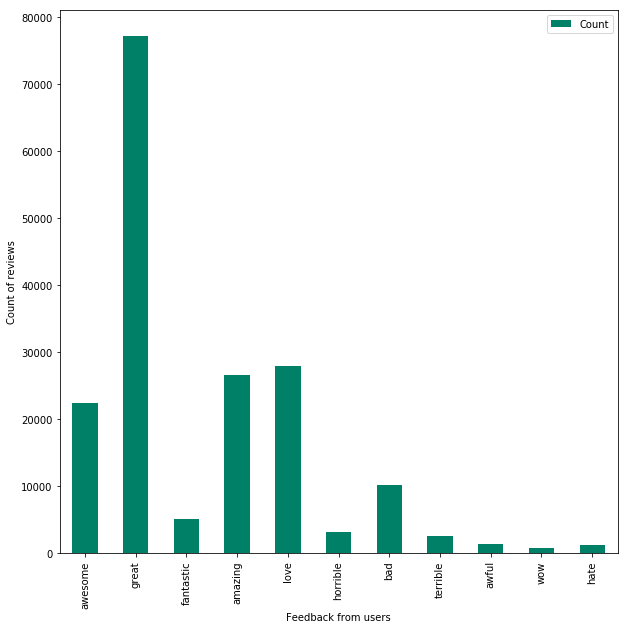

In [10]:
feedbackPlot.plot(kind='bar', stacked=False, figsize=[10,10], colormap='summer')
plt.xlabel('Feedback from users')
plt.ylabel('Count of reviews')

The above graph depicts that there are more number of positive tips given by the users than the negative tips.